In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

# REGULAR

In [2]:
path = 'results/jabba_reg.csv'
df = pd.read_csv(path)

serial_times = list(df.groupby("size")["time"].max())
t = [list(e[1]) for e in list(df.groupby("size")["time"])]
speedup = np.array([np.ones(4) / np.array(t[i]) * serial_times[i] for i in range(len(serial_times))]).reshape(-1)
df["speedup"] = speedup

df["efficiency"] = df["speedup"] / df["CPU"]

df["karp"] = (1 / df["speedup"] - 1 / df["CPU"]) / (1 - 1 / df["CPU"])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0.0)
df

,mode,CPU,size,time,pi,speedup,efficiency,karp
0,regular,1,5,0.053523,3.148320,1.000000,1.000000,0.000000
1,regular,2,5,0.027216,3.136680,1.966571,0.983286,0.016999
2,regular,3,5,0.018227,3.145960,2.936506,0.978835,0.010811
3,regular,4,5,0.013750,3.144400,3.892665,0.973166,0.009191
4,regular,1,6,0.552023,3.142388,1.000000,1.000000,0.000000
5,regular,2,6,0.277323,3.141784,1.990542,0.995271,0.004751
6,regular,3,6,0.188758,3.142788,2.924501,0.974834,0.012908
7,regular,4,6,0.145045,3.141184,3.805883,0.951471,0.017001
8,regular,1,7,5.542166,3.141630,1.000000,1.000000,0.000000
9,regular,2,7,2.791852,3.140376,1.985122,0.992561,0.007495


### TIME

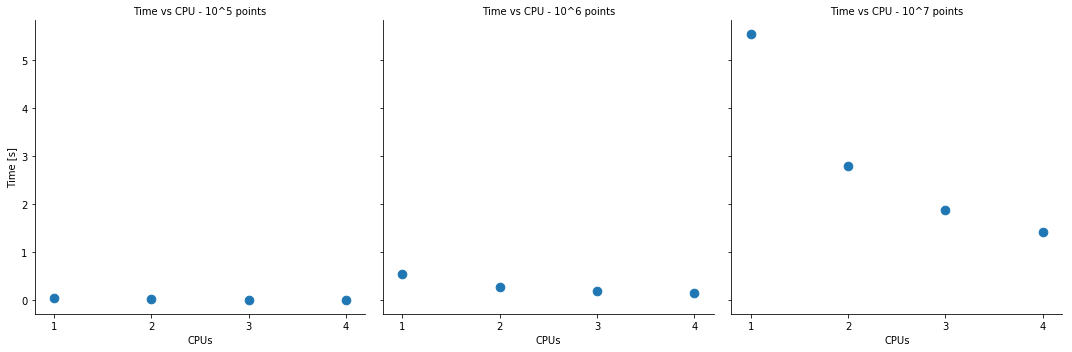

In [3]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "time", s=75)
        .set_titles("Time vs CPU - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Time [s]"))
g.set(xticks=[1,2,3,4])

### SPEEDUP

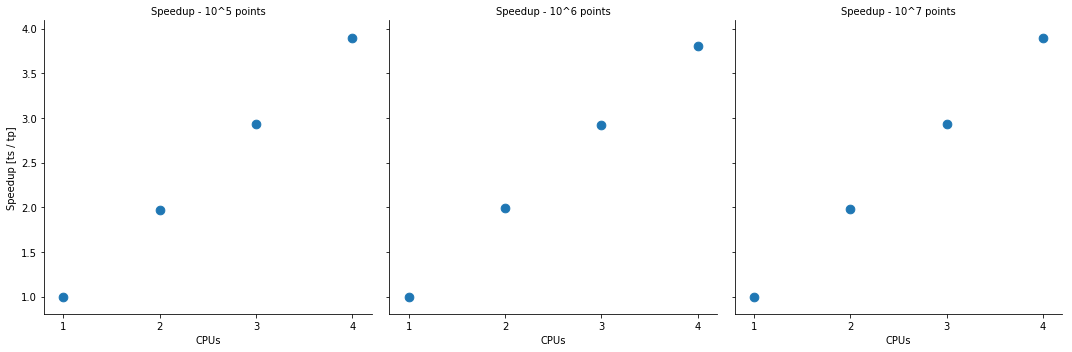

In [4]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "speedup", s=75)
        .set_titles("Speedup - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Speedup [ts / tp]"))
g.set(xticks=list(range(1,5)))

### EFFICIENCY

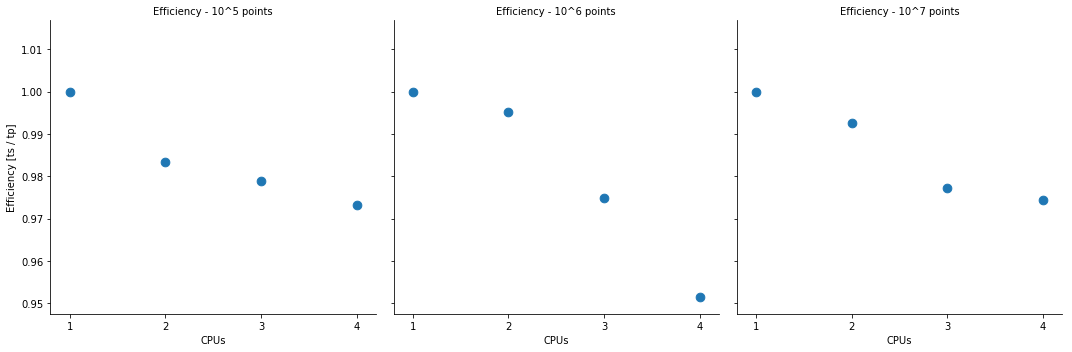

In [5]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "efficiency", s=75)
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(xticks=list(range(1,5)))

### SERIAL FRACTION

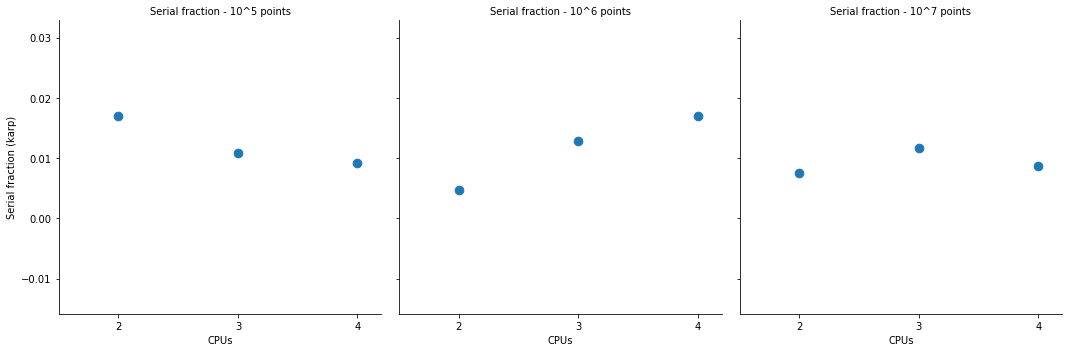

In [6]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "karp", s=75)
        .set_titles("Serial fraction - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Serial fraction (karp)"))
g.set(xlim=(1.5, None))
g.set(xticks=list(range(2,5)))

# SCALED

In [19]:
path = 'results/jabba_scale.csv'
df = pd.read_csv(path)

serial_times = list(df.groupby("size")["time"].min())
t = [list(e[1]) for e in list(df.groupby("size")["time"])]
print(serial_times)
speedup = np.array([np.ones(4) / np.array(t[i]) * serial_times[i] for i in range(len(serial_times))]).reshape(-1)
df["speedup"] = speedup * df["CPU"]

df["efficiency"] = df["speedup"] / df["CPU"]

df["karp"] = (1 / df["speedup"] - 1 / df["CPU"]) / (1 - 1 / df["CPU"])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0.0)
df

[0.0535736083984, 0.556400537491, 5.56507611275]


,mode,CPU,size,time,pi,speedup,efficiency,karp
0,scale,1,5,0.053574,3.137680,1.000000,1.000000,0.000000
1,scale,2,5,0.053811,3.142360,1.991192,0.995596,0.004424
2,scale,3,5,0.055421,3.144053,2.900005,0.966668,0.017240
3,scale,4,5,0.054728,3.145710,3.915642,0.978910,0.007181
4,scale,1,6,0.556401,3.139912,1.000000,1.000000,0.000000
5,scale,2,6,0.560817,3.142252,1.984251,0.992125,0.007937
6,scale,3,6,0.562910,3.140955,2.965308,0.988436,0.005850
7,scale,4,6,0.566770,3.141618,3.926818,0.981705,0.006212
8,scale,1,7,5.565076,3.142941,1.000000,1.000000,0.000000
9,scale,2,7,5.583234,3.141454,1.993496,0.996748,0.003263


### TIME

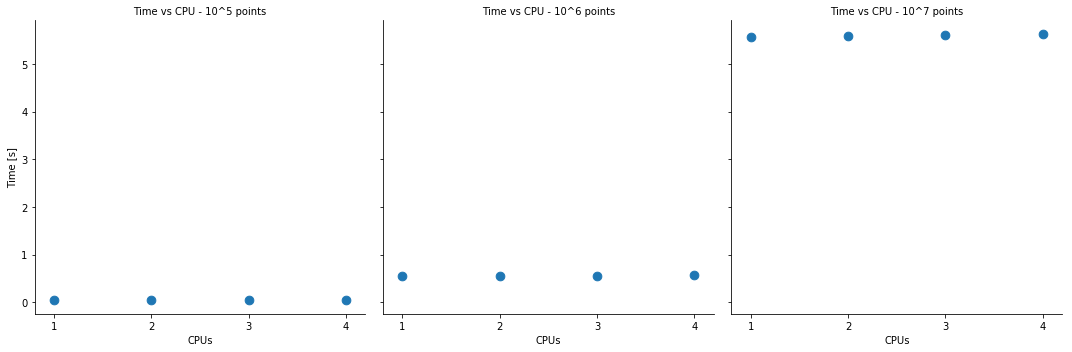

In [20]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "time", s=75)
        .set_titles("Time vs CPU - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Time [s]"))
g.set(xticks=list(range(1,5)))

### SPEEDUP

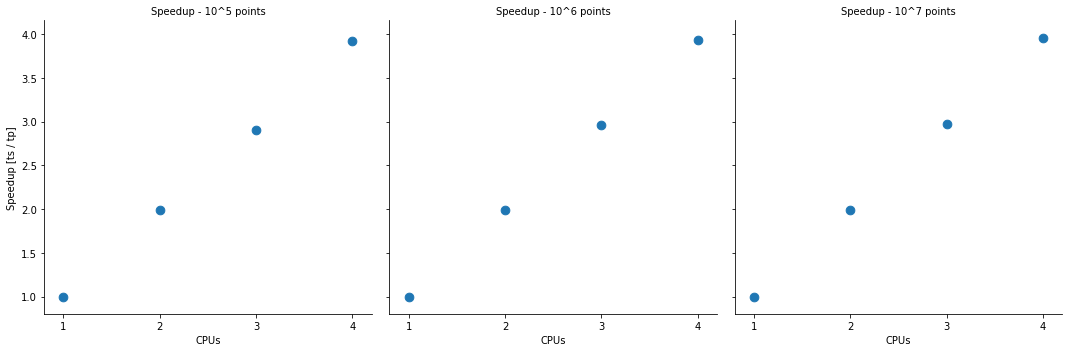

In [21]:
g = sns.FacetGrid(df, col="size", height=5)
g = (g.map(plt.scatter, "CPU", "speedup", s=75)
        .set_titles("Speedup - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Speedup [ts / tp]"))
g.set(xticks=list(range(1,5)))

### EFFICIENCY

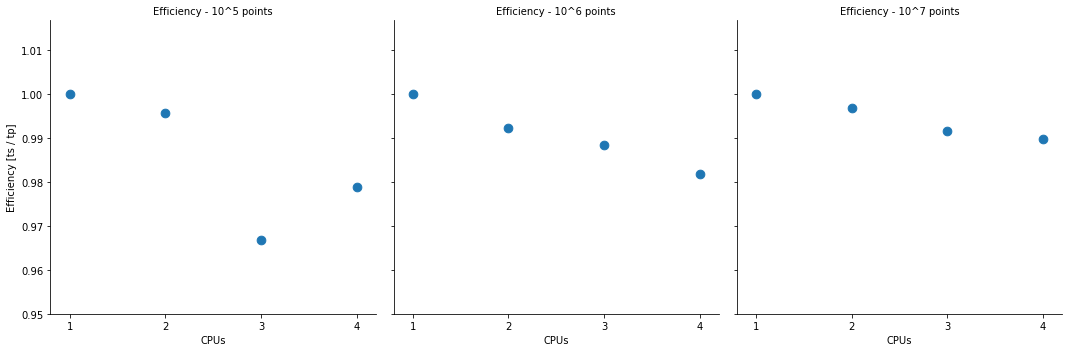

In [22]:
g = sns.FacetGrid(df, col="size",height=5)
g = (g.map(plt.scatter, "CPU", "efficiency", s=75)
        .set_titles("Efficiency - 10^{col_name} points")
        .set_xlabels("CPUs")
        .set_ylabels("Efficiency [ts / tp]"))
g.set(xticks=list(range(1,5)))
# g.set(ylim=(0.1,1.1))

### SERIAL FRACTION